In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cbsyst as cb

In [2]:
filename = 'wcoa_cruise/WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


In [3]:
Csw = cb.Csys(pH=df['PH_TOT'],
             TA=df['ALKALI'],
             T=df['CTDTMP'],
             S=df['CTDSAL'],
             P=df['CTDPRS'])

In [4]:
Csw.keys()

dict_keys(['unit', 'Ks', 'TSi', 'TP', 'P', 'S', 'T', 'Mg', 'Ca', 'BT', 'pCO2', 'fCO2', 'TA', 'CO3', 'HCO3', 'CO2', 'DIC', 'pH', 'TS', 'TF', 'H', 'CAlk', 'BAlk', 'PAlk', 'SiAlk', 'OH', 'Hfree', 'HSO4', 'HF'])

In [5]:
Csw.Ks.keys()

dict_keys(['K0', 'K1', 'K2', 'KSO4', 'KB', 'KspA', 'KspC', 'KW', 'KP1', 'KP2', 'KP3', 'KF', 'KSi'])

<IPython.core.display.Javascript object>


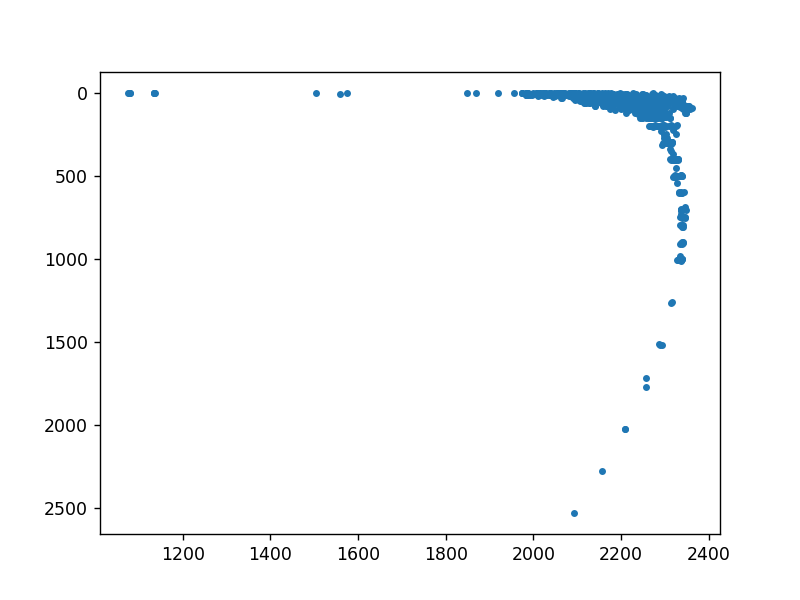

In [6]:
plt.figure()
plt.plot(Csw['DIC'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()

In [7]:
OmegaA = Csw['Ca']*Csw['CO3']/(Csw.Ks['KspA']*1e6)

<IPython.core.display.Javascript object>


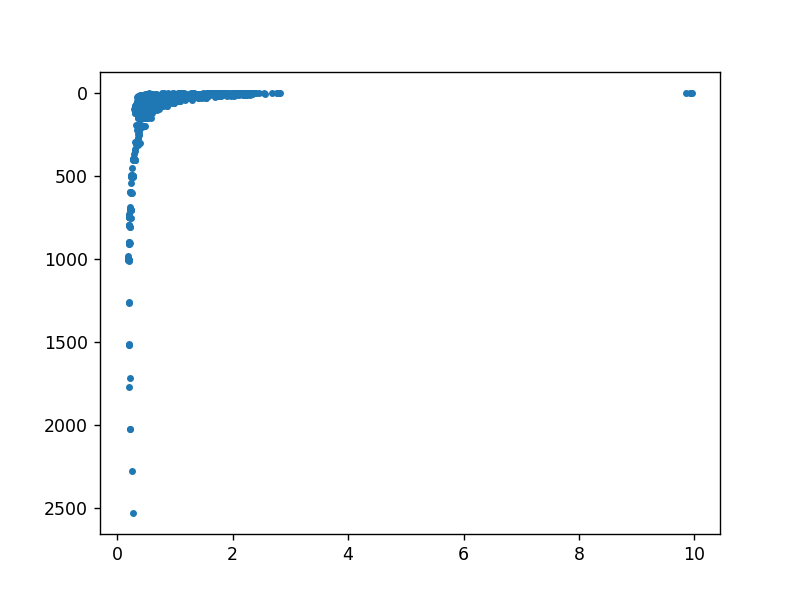

In [8]:
plt.figure()
plt.plot(OmegaA, df['CTDPRS'],'.')
plt.gca().invert_yaxis()

In [9]:
##add omega a to the pandas dataframe
df['OmegaA'] = OmegaA

<IPython.core.display.Javascript object>


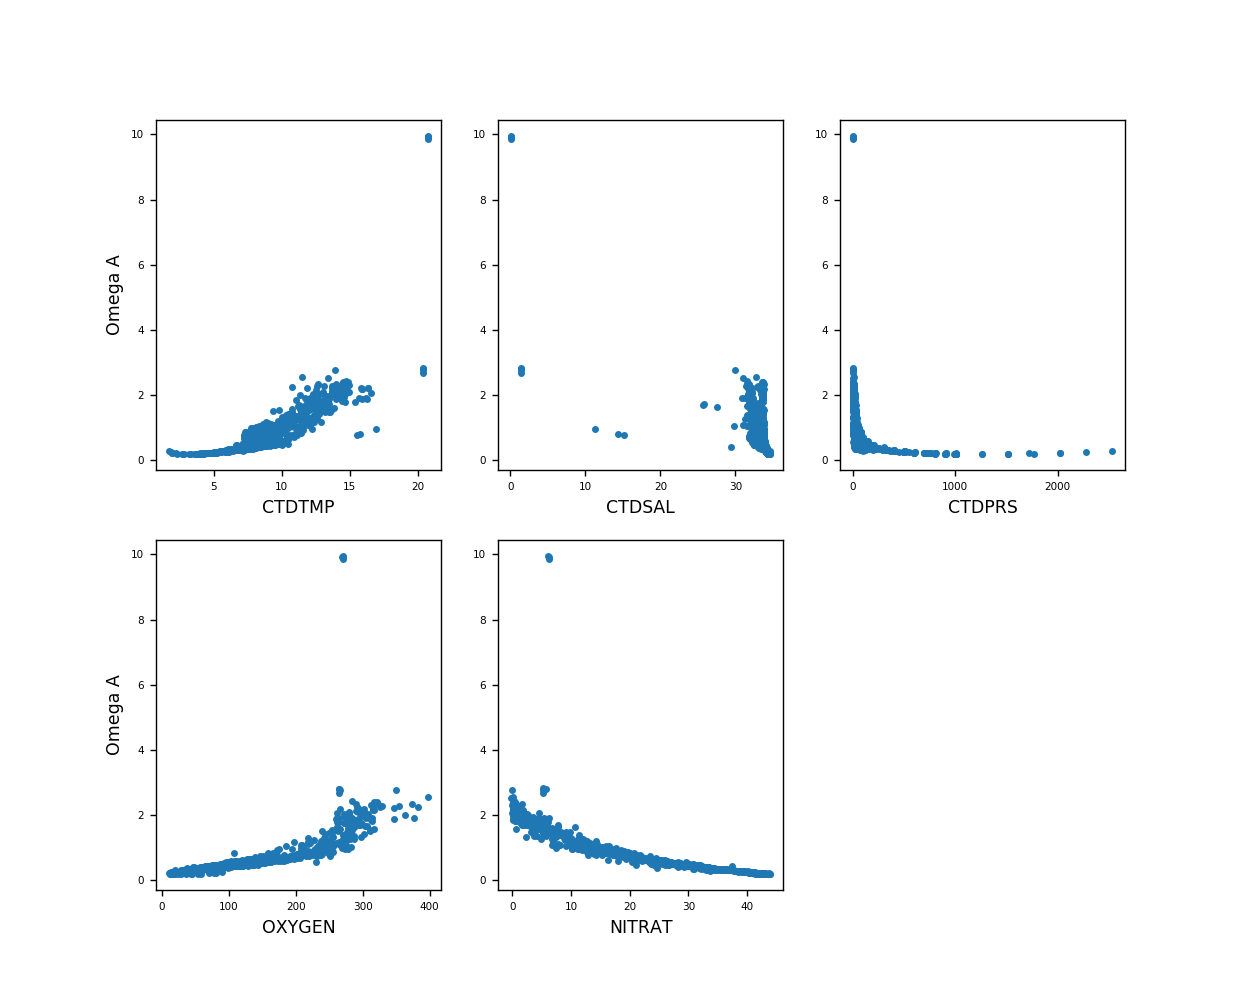

In [10]:
plotvar = ['CTDTMP','CTDSAL', 'CTDPRS', 'OXYGEN','NITRAT']
count = 0
plt.figure(figsize = (10,8))
for var in plotvar:
    count = count+1
    plt.subplot(2,3,count)
    plt.plot(df[var],df['OmegaA'],'.',)
    plt.xlabel(var)
    if count == 1 or count ==4 :
        plt.ylabel('Omega A')
    plt.yticks(fontsize=6)
    plt.xticks(fontsize=6)
    

In [11]:
a = df['CTDTMP']
b = df['CTDSAL']
c = df['CTDPRS']
d = df['OXYGEN']
e = df['NITRAT']
f = df['OmegaA']
ii = (np.isfinite(a) & np.isfinite(b) & np.isfinite(c) & np.isfinite(d) & np.isfinite(e) & np.isfinite(f) )
jj = ((df['CTDPRS']>30) & (df['CTDPRS']<300))

temp = df['CTDTMP'][ii][jj]
sal = df['CTDSAL'][ii][jj]
press = df['CTDPRS'][ii][jj]
oxygen = df['OXYGEN'][ii][jj]
nitrate = df['NITRAT'][ii][jj]
OmA = df['OmegaA'][ii][jj]

xmatrix = np.ones([len(OmA),6])*np.nan

xmatrix[:,0]=1
xmatrix[:,1] = temp
xmatrix[:,2] = sal
xmatrix[:,3] = press
xmatrix[:,4] = oxygen
xmatrix[:,5] = nitrate

print(len(temp))



290


# Model 1

In [12]:
c = np.linalg.lstsq(xmatrix,OmA)
print(c)
[c0,c1,c2,c3,c4,c5]=[c[0][0],c[0][1],c[0][2],c[0][3],c[0][4],c[0][5]]
print(c2)

(array([ -3.07750516e-01,   3.19305644e-02,   2.83171680e-02,
         1.99215122e-04,   1.13431498e-03,  -1.92288348e-02]), array([ 0.62585455]), 6, array([  2.90649174e+03,   1.19459427e+03,   2.10365774e+02,
         3.74324565e+01,   1.03884693e+01,   1.32594860e-01]))
0.028317167997


<IPython.core.display.Javascript object>


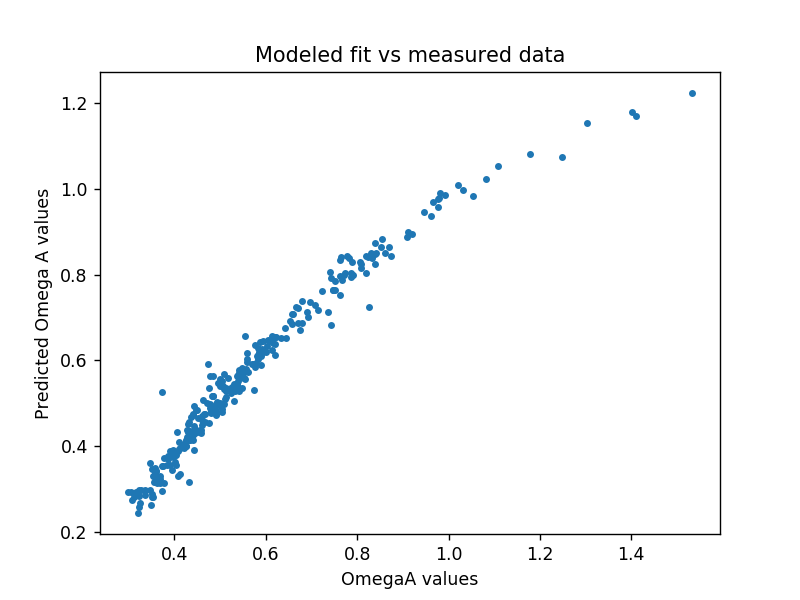

In [13]:
predictOmega = np.dot(xmatrix,[c0,c1,c2,c3,c4,c5])

residuals = predictOmega - OmA
plt.figure()
plt.plot(OmA,predictOmega,'.')
plt.xlabel('OmegaA values')
plt.ylabel('Predicted Omega A values')
plt.title('Modeled fit vs measured data');

<IPython.core.display.Javascript object>


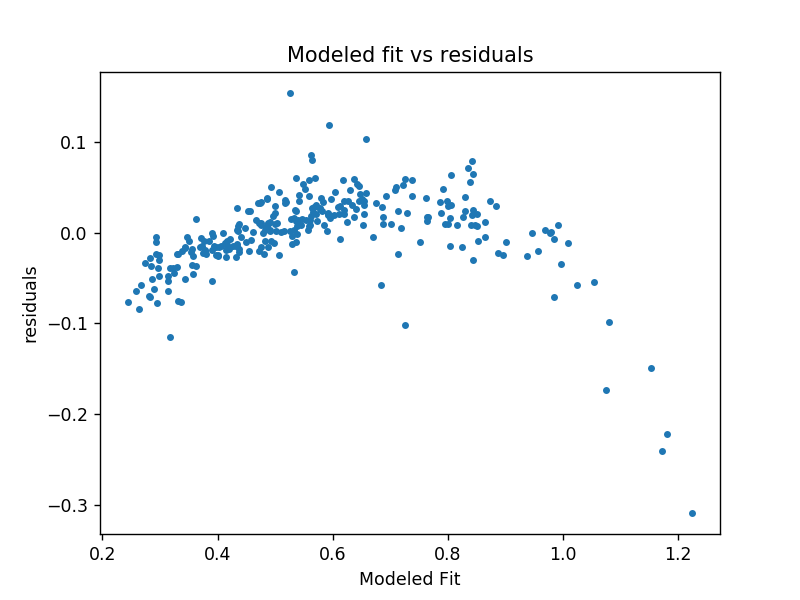

In [14]:
plt.figure()
plt.plot(predictOmega,residuals,'.')
plt.xlabel('Modeled Fit')
plt.ylabel('residuals')
plt.title('Modeled fit vs residuals');

In [20]:
import statsmodels.api as sm


res = sm.OLS(OmA,xmatrix).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 OmegaA   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1073.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          4.64e-182
Time:                        13:01:43   Log-Likelihood:                 478.59
No. Observations:                 290   AIC:                            -945.2
Df Residuals:                     284   BIC:                            -923.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3078      0.354     -0.870      0.3

# Model 2

In [16]:
tref = 8.0
oref = 140

xmatrix2 = np.ones([len(OmA),3])*np.nan

xmatrix2[:,0]=1
xmatrix2[:,1] = (oxygen-oref)
xmatrix2[:,2] = (temp-tref)*(oxygen-oref)


cmod2 = np.linalg.lstsq(xmatrix2,OmA)
print(c)
[c2_0,c2_1,c2_2]=[cmod2[0][0],cmod2[0][1],cmod2[0][2]]

(array([ -3.07750516e-01,   3.19305644e-02,   2.83171680e-02,
         1.99215122e-04,   1.13431498e-03,  -1.92288348e-02]), array([ 0.62585455]), 6, array([  2.90649174e+03,   1.19459427e+03,   2.10365774e+02,
         3.74324565e+01,   1.03884693e+01,   1.32594860e-01]))


<IPython.core.display.Javascript object>


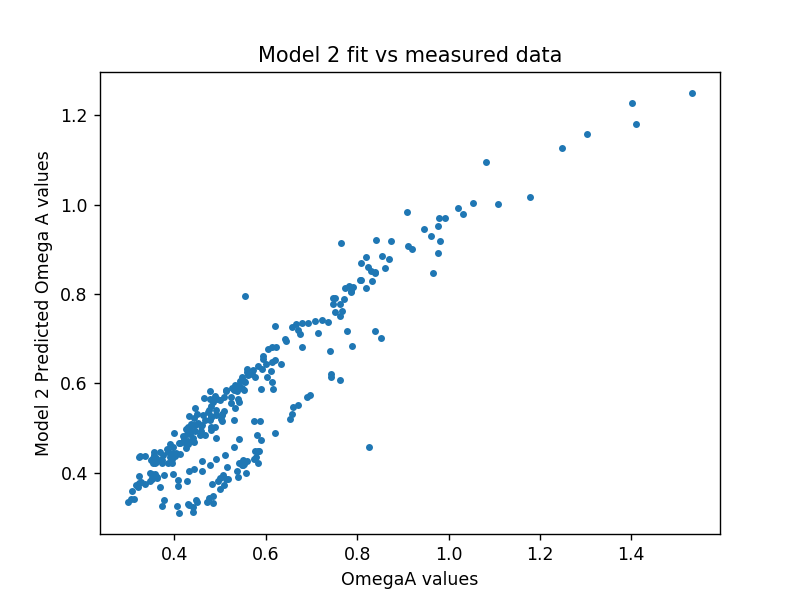

In [17]:
predictOmega2 = np.dot(xmatrix2,[c2_0,c2_1,c2_2])
residuals = predictOmega2 - OmA
plt.figure()
plt.plot(OmA,predictOmega2,'.')
plt.xlabel('OmegaA values')
plt.ylabel('Model 2 Predicted Omega A values')
plt.title('Model 2 fit vs measured data');

<IPython.core.display.Javascript object>


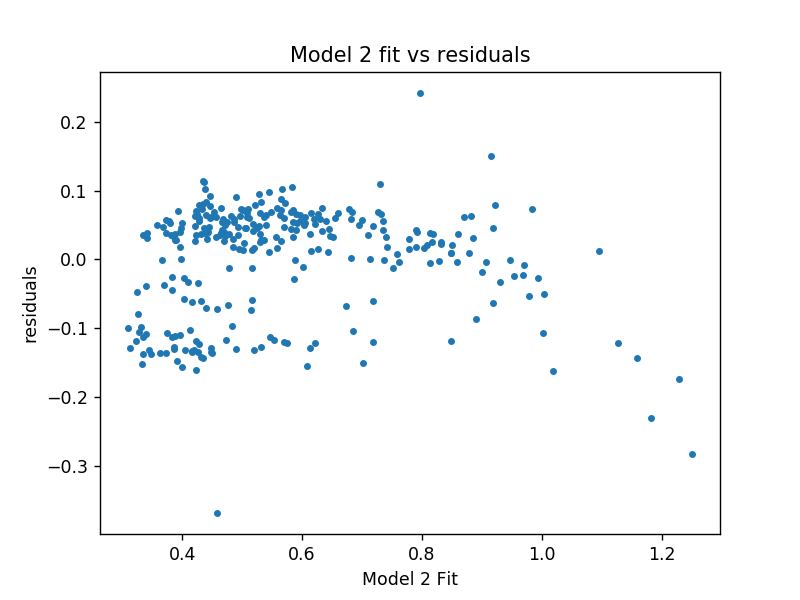

In [18]:
plt.figure()
plt.plot(predictOmega2,residuals,'.')
plt.xlabel('Model 2 Fit')
plt.ylabel('residuals')
plt.title('Model 2 fit vs residuals');

In [21]:
res2 = sm.OLS(OmA,xmatrix2).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 OmegaA   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     793.2
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          1.22e-117
Time:                        13:02:14   Log-Likelihood:                 317.02
No. Observations:                 290   AIC:                            -628.0
Df Residuals:                     287   BIC:                            -617.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5742      0.005    112.448      0.0

### Compare the two regressions in words, commenting on:

    - Statistical significance 
    - Multiple co-linearity 
    - Applicability of the model equations 
    - The potential for numerical errors

**Statistical significance:** Both models are statistically significant, but the Adjusted R - squared is higher in the first model than the second.

**Multiple co-linearity:** The first model has high condition number, indicating strong co-linearity between the variables. The second model is more appropriate as far as the issue of co-linearity.

**Applicability of the model equations:** The second model has more meaningful coefficients, and is more applicable.

**The potential for numerical errors:** The second equation has less potential for numerical errors, as it has a reference number to help , and only two variables. 

> In all, the first model accounts for more of the variability in Omega A, but this is probably due to adding more variables, and the strong co-linearity between those variables. The first model is also more prone to numerical errors in entry because it relies on more variables without a reference. Additionally, there is less of a systematic pattern in the plot of modeled data vs residuals for the second model than in the first. In the first plot, there seems to be a parabolic relationship between the two, that the interaction term of the second model accounts for. I believe the second model has more ecological signifcance than the first model, and will better predict the Omega A in future studies. 